In [1]:
# numpy
import numpy as np
# pandas
import pandas as pd
# pyplot
import matplotlib.pyplot as plt
# seaborn
import seaborn as sns

%matplotlib inline

sns.set(color_codes=True)

In [2]:
# import tips dataset from seaborn
tips = sns.load_dataset("tips")

In [3]:
# set pandas dataframe for tips dataset
df = pd.DataFrame(data=tips)

# Exploratory Analysis

The head function allows for a peak at the dataset. We can see categorical (sex, smoker, day, and time) as well as numerical (total_bill, tip, size) data. We can infer from this snapshot that there are potential correlations between the the customer's tip and the other variables.

In [4]:
# head of tips dataset displaying first 5 rows of dataset
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


The head function gives a glimpse at the dataset, showing the first five rows. It also shows the types of data in the dataset, 3 columns of numerical data and 3 columns of categorical data.

In [5]:
# last 5 rows of dataset
df.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


The tail function indicates that the dataset may be complete, with no gaps or missing data.

In [6]:
# Description of dataset
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


The describe function shows the the distribution of the dataset which is illustrated below.

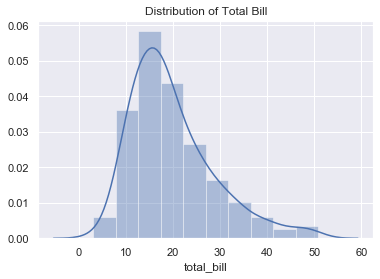

In [7]:
sns.distplot(df['total_bill'], bins=10);
plt.title("Distribution of Total Bill");

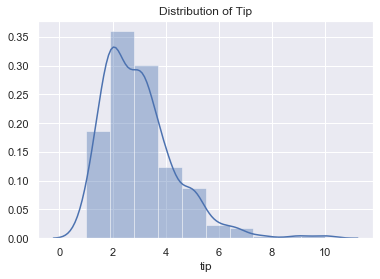

In [8]:
sns.distplot(df['tip'], bins=10);
plt.title("Distribution of Tip");

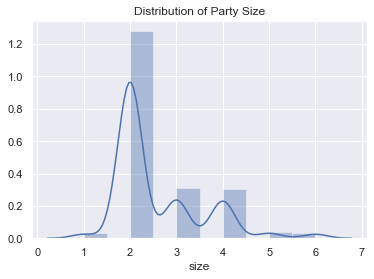

In [9]:
sns.distplot(df['size'], bins=10);
plt.title("Distribution of Party Size");

In [10]:
# description of just male customers in dataset
male = df.loc[(df.sex=="Male")];
male.describe()

,total_bill,tip,size
count,157.000000,157.000000,157.000000
mean,20.744076,3.089618,2.630573
std,9.246469,1.489102,0.955997
min,7.250000,1.000000,1.000000
25%,14.000000,2.000000,2.000000
50%,18.350000,3.000000,2.000000
75%,24.710000,3.760000,3.000000
max,50.810000,10.000000,6.000000


In [11]:
# description of female customers in dataset
female = df.loc[(df.sex=="Female")];
female.describe()

,total_bill,tip,size
count,87.000000,87.000000,87.000000
mean,18.056897,2.833448,2.459770
std,8.009209,1.159495,0.937644
min,3.070000,1.000000,1.000000
25%,12.750000,2.000000,2.000000
50%,16.400000,2.750000,2.000000
75%,21.520000,3.500000,3.000000
max,44.300000,6.500000,6.000000


When the dataset is seperated between male and female it is evident that more male customers attended the restaurant during this period. The next section of this notebook will explore whether this difference has a significant impact of the dataset.

In [12]:
# description of smokers in dataset 
s = df.loc[(df.smoker=="Yes")];
s.describe()

,total_bill,tip,size
count,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602
std,9.832154,1.401468,0.810751
min,3.070000,1.000000,1.000000
25%,13.420000,2.000000,2.000000
50%,17.920000,3.000000,2.000000
75%,26.860000,3.680000,3.000000
max,50.810000,10.000000,5.000000


In [13]:
# description of non-smokers in dataset
ns = df.loc[(df.smoker=="No")];
ns.describe()

,total_bill,tip,size
count,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874
std,8.255582,1.377190,1.017984
min,7.250000,1.000000,1.000000
25%,13.325000,2.000000,2.000000
50%,17.590000,2.740000,2.000000
75%,22.755000,3.505000,3.000000
max,48.330000,9.000000,6.000000


There are significantly more non-smokers than non-smokers in the dataset. This notebook will later explore whether being a smoker influences the tip given for the meal.

# Relationship between total bill and tip

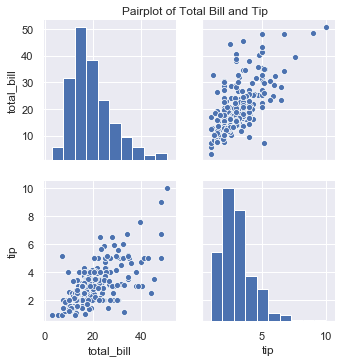

In [14]:
# pairplot of total bill and tip 
sns.pairplot(tips, x_vars=["total_bill", "tip"], y_vars=["total_bill", "tip"]);
plt.title("Pairplot of Total Bill and Tip",  {'horizontalalignment': "right"});

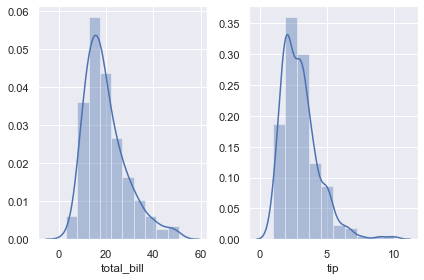

In [15]:
# histogram of total bill and tips side by side
plt.subplot(1,2,1)
sns.distplot(tips['total_bill'], bins=10);

plt.subplot(1,2,2)
sns.distplot(tips['tip'], bins=10);

plt.tight_layout()

The distribution of both the total bill and tip are similar indicating a correlation between the total amount spent and total amount tipped.

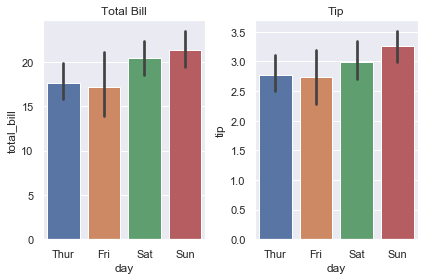

In [16]:
plt.subplot(1,2,1)
sns.barplot(x='day', y='total_bill', data=df)
plt.title("Total Bill");

plt.subplot(1,2,2)
sns.barplot(x='day', y='tip', data=df)
plt.title("Tip");
plt.tight_layout()

This barplot further illustrates the relationship between the total bill and tip. When comparing the tip on each day the tip rises and falls in correlation with the total bill each day.

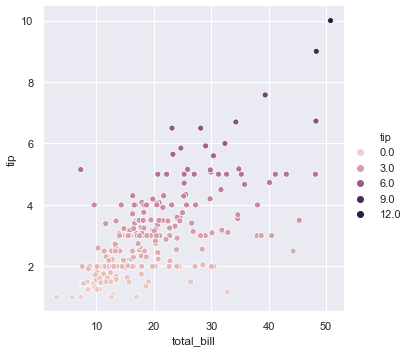

In [30]:
# scatterplot of total bill and tip
sns.relplot(x="total_bill", y="tip", hue="tip", data=df);


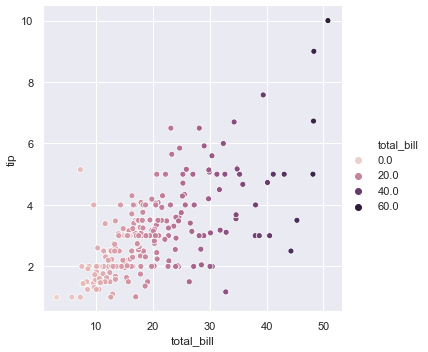

In [31]:
sns.relplot(x="total_bill", y="tip", hue="total_bill", data=df);

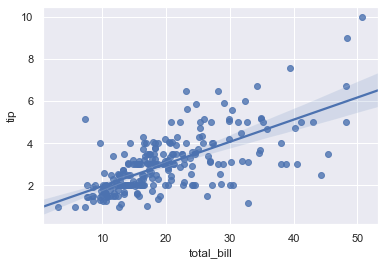

In [32]:
sns.regplot(x='total_bill', y='tip', data=df);

# Relationship between variables

## Sex 

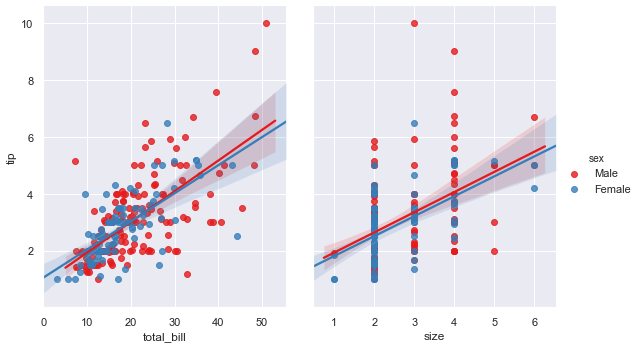

In [33]:
# pairplot with total bill and party six on x axis and tip on y axis
# hue distinguishing between male and female
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             hue="sex", height=5, aspect=.8, kind="reg", palette="Set1");

Text about above plot 

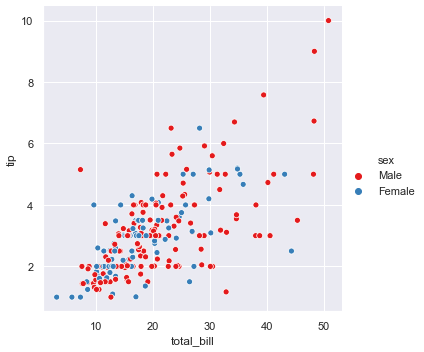

In [34]:
# scaterplot of toal bill and tip
sns.relplot(x="total_bill", y="tip", hue="sex", data=tips, palette="Set1");

At a glance this plot indicates that men may have spent, and tipped, more than women. However, as noted earlier this may be influenced by the higher number of men who attended the restaurant.

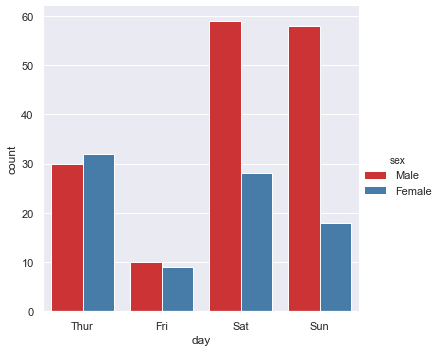

In [35]:
# count of number of customers each day separating male and female
sns.catplot(x="day", hue="sex", kind="count", data=df, palette="Set1");

The difference between the number of men and women who attend the restaurant is most evident at the weekend.

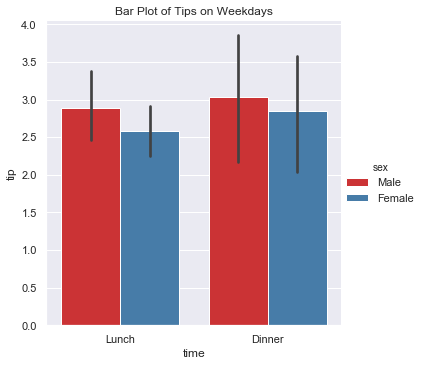

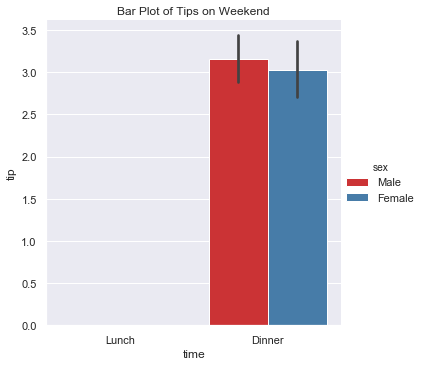

In [36]:
# barplot of weekday
weekday = df.loc[(df.day=="Thur")|(df.day=="Fri")]
sns.catplot(x="time", y="tip", kind="bar", hue="sex", data=weekday, palette="Set1");
plt.title("Bar Plot of Tips on Weekdays");

# barplot of weekend 
weekend = df.loc[(df.day=="Sat")|(df.day=="Sun")]
sns.catplot(x="time", y="tip", kind="bar", hue="sex", data=weekend, palette="Set1");
plt.title("Bar Plot of Tips on Weekend");

From this bar plot it is evident that the restaurant does not serve lunch on the weekend, only dinner. As such, the next variable that will be examined is whether or not there is a significant difference between tips for lunch and dinner.

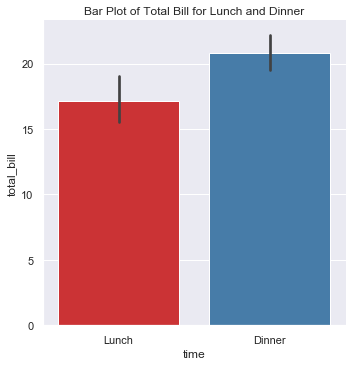

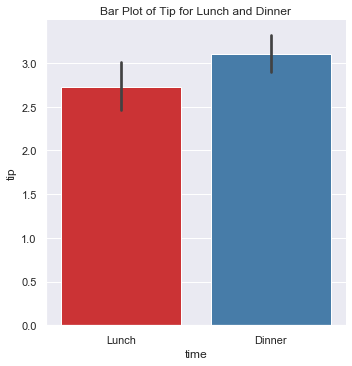

In [37]:
# bar plot of total for lunch and dinner
sns.catplot(x="time", y="total_bill", kind="bar", data=df, palette="Set1");
plt.title("Bar Plot of Total Bill for Lunch and Dinner");

# bar plot of tip for lunch and dinner
sns.catplot(x="time", y="tip", kind="bar", data=df, palette="Set1");
plt.title("Bar Plot of Tip for Lunch and Dinner");

The average cost for dinner is higher than the average cost of lunch and subsequently the tip for dinner is higher than the tip for lunch.

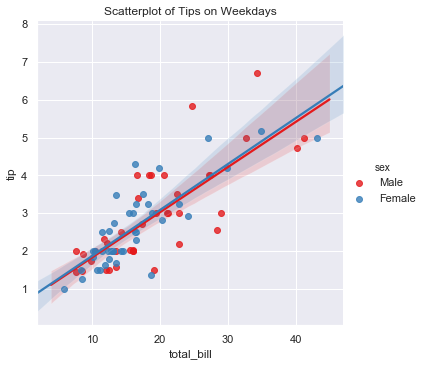

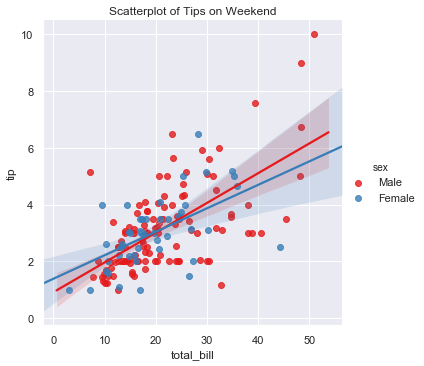

In [38]:
# linear regression model of weekday
weekday = df.loc[(df.day=="Thur")|(df.day=="Fri")]
sns.lmplot("total_bill", "tip", hue="sex", data=weekday, palette="Set1");
plt.title("Scatterplot of Tips on Weekdays");

# linear regression model of weekend 
weekend = df.loc[(df.day=="Sat")|(df.day=="Sun")]
sns.lmplot("total_bill", "tip", hue="sex", data=weekend, palette="Set1");
plt.title("Scatterplot of Tips on Weekend");

These plots indicate that the total bill and tips of both male and female customers are more inline during the weekdays. As such the higher number of men at the weekend may skew the numbers overall.

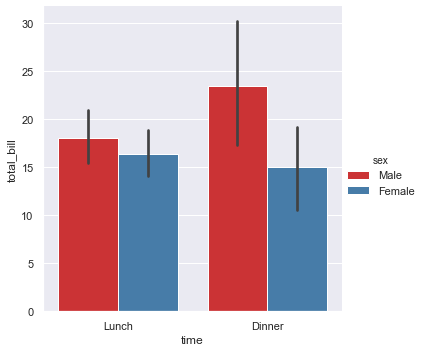

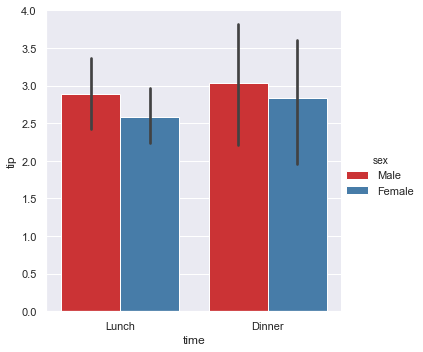

In [39]:
sns.catplot(x="time", y="total_bill", hue="sex", kind="bar", data=weekday, palette="Set1");
sns.catplot(x="time", y="tip", hue="sex", kind="bar", data=weekday, palette="Set1");


On weekdays, men spend significantly more on the total bill than women but their tips are quite similar.

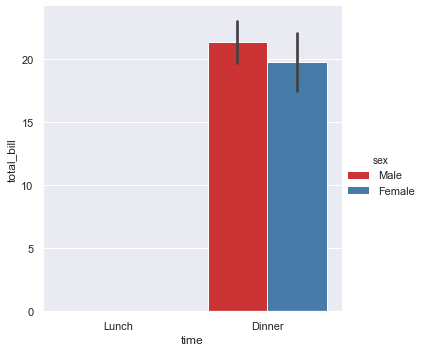

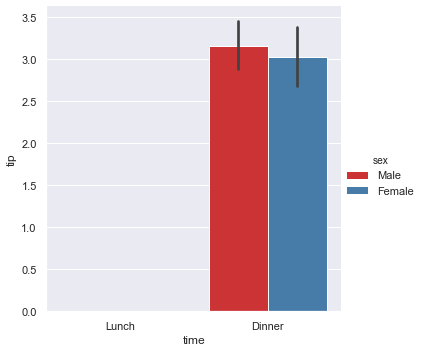

In [40]:
sns.catplot(x="time", y="total_bill", hue="sex", kind="bar", data=weekend, palette="Set1");

sns.catplot(x="time", y="tip", hue="sex", kind="bar", data=weekend, palette="Set1");

On weekends, men spend marginally more on average than women and the bar plot for the tips reiterates that.

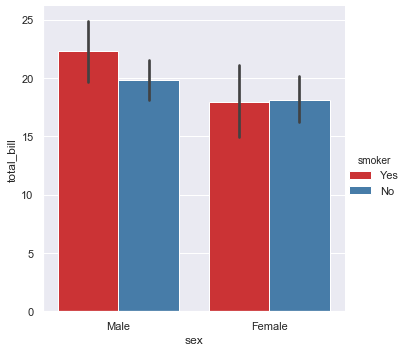

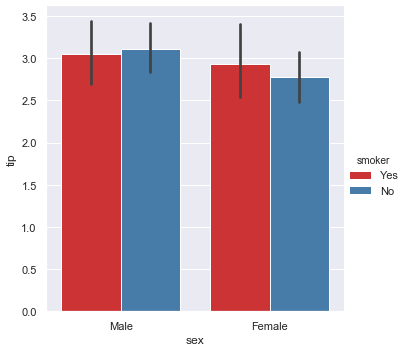

In [81]:
# Bar chart of male and female tips differenciating between smoker and non-smoker
sns.catplot(x="sex", y="total_bill", hue="smoker", kind=("bar"), data=df, palette="Set1");

sns.catplot(x="sex", y="tip", hue="smoker", kind=("bar"), data=df, palette="Set1");

Male smokers tip less than male non-smokers while spending more on the total bill. However, female smokers tip more than non-smokers despite spending less on the total bill, on average.

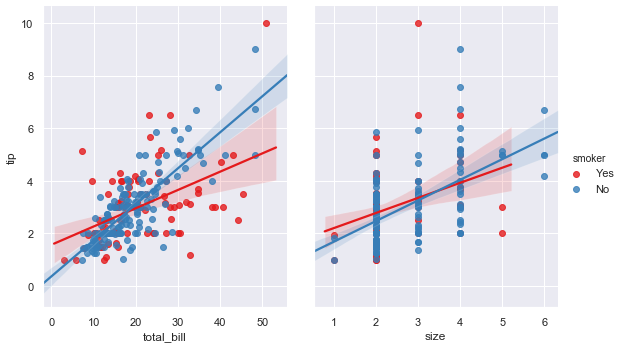

In [84]:
sns.pairplot(df, x_vars=["total_bill", "size"], y_vars=["tip"],
             hue="smoker", height=5, aspect=.8, kind="reg", palette="Set1");

It is evident from the regression plot that there is a significant difference between the tips of smokers and non-smokers.

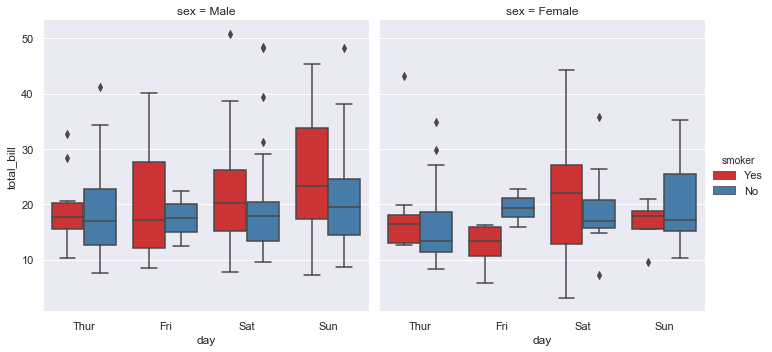

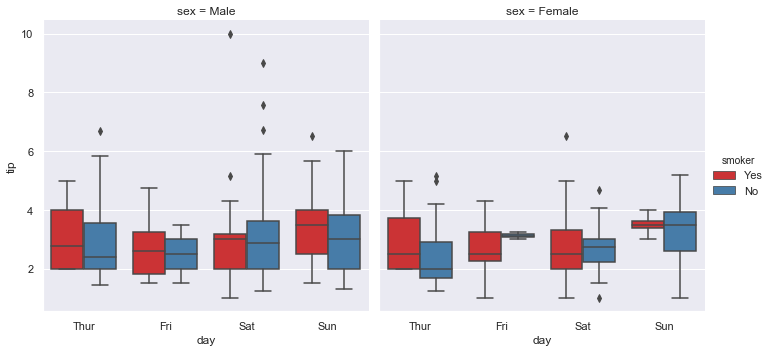

In [94]:
# box plot of total bill and tips segretating between male and female
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", col="sex", data=df, palette="Set1");

sns.catplot(x="day", y="tip", hue="smoker", kind="box", col="sex", data=df, palette="Set1");

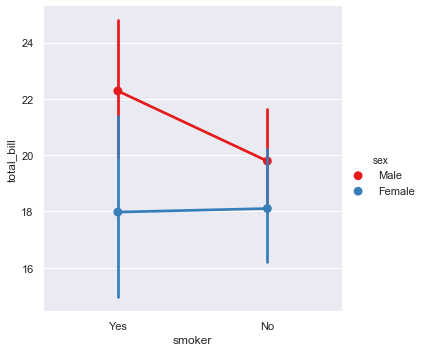

In [100]:
sns.catplot(x="smoker", y="total_bill", hue="sex", kind="point", data=df, palette="Set1");

Male smokers spend more on average than male none smokers while female smokers and non-smokers are alot closer when it comes to the total bill. How is this reflected in tips?

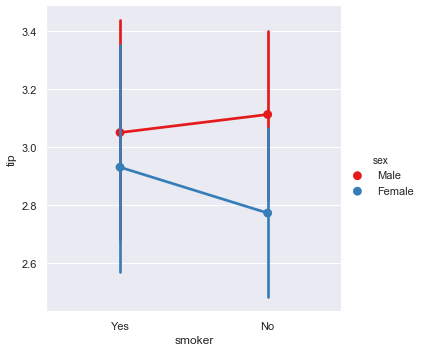

In [99]:
sns.catplot(x="smoker", y="tip", hue="sex", kind="point", data=df, palette="Set1");

This point plot reiterates that women tip significantly more than non-smokers when compared to men.

# Break

This reiterates that men spend more and tip more than women overall. However, the significant difference between the number of men and women that attend at the weekend will be examined further to see if there is a relationship.

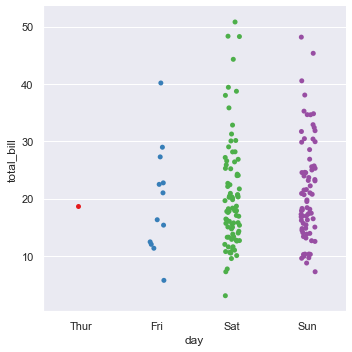

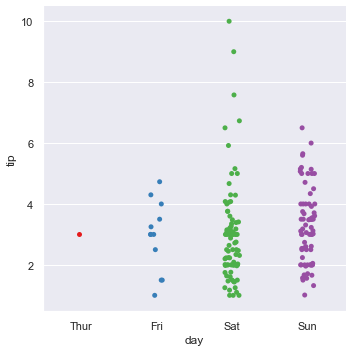

In [43]:
din = df.loc[(df.time=="Dinner")];
lun = df.loc[(df.time=="Lunch")];

sns.catplot(x="day", y="total_bill", data=din, palette="Set1");

sns.catplot(x="day", y="tip", data=din, palette="Set1");

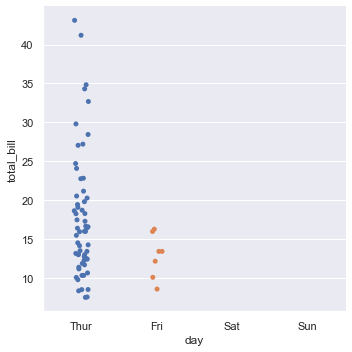

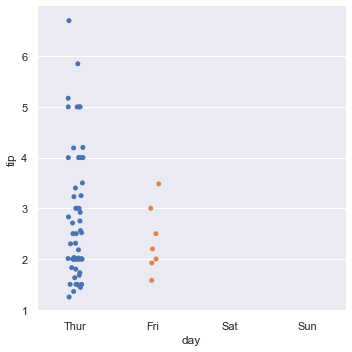

In [44]:
sns.catplot(x="day", y="total_bill", data=lun);

sns.catplot(x="day", y="tip", data=lun);

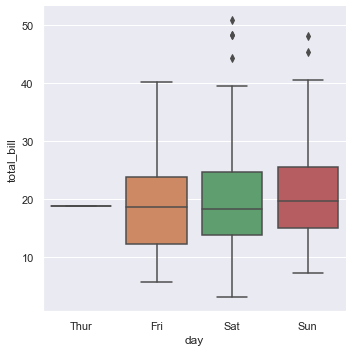

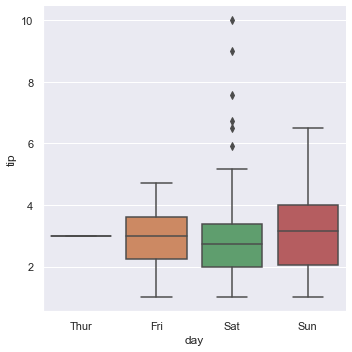

In [45]:
sns.catplot(x="day", y="total_bill", kind="box", data=din);

sns.catplot(x="day", y="tip", kind="box", data=din);

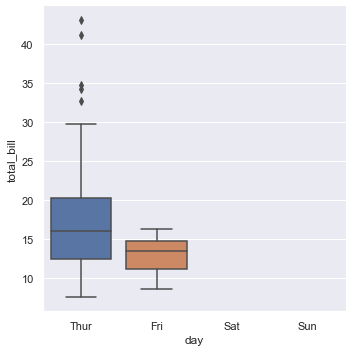

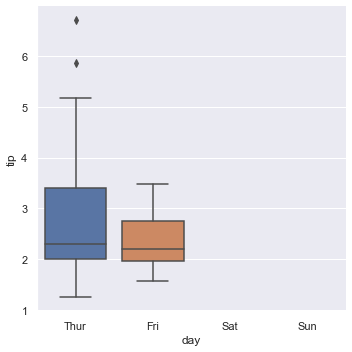

In [46]:
sns.catplot(x="day", y="total_bill", kind="box", data=lun);

sns.catplot(x="day", y="tip", kind="box", data=lun);

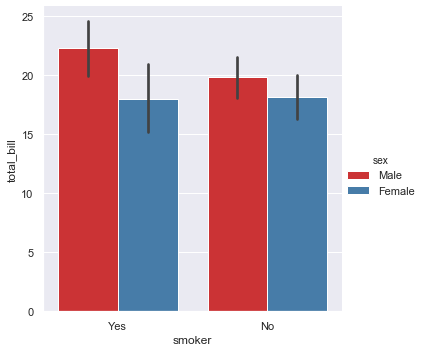

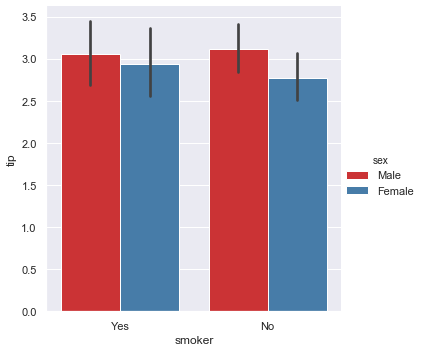

In [47]:
# bar chart of total bill differentiating between male/female smokers
sns.catplot(x="smoker", y="total_bill", hue="sex", kind="bar", data=df, palette="Set1");

# bar chart of tip differentiating between male/female smokers
sns.catplot(x="smoker", y="tip", hue="sex", kind="bar", data=df, palette="Set1");

Here we can see that male smokers have spent more than male non-smokers but tip less. Alternatively female smokers and non-smokers have spent roughly the same but smokers tipped slightly more.

## Smoker 

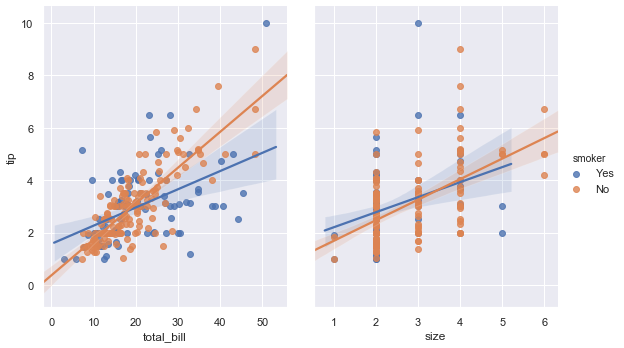

In [48]:
sns.pairplot(df, x_vars=["total_bill", "size"], y_vars=["tip"],
             hue="smoker", height=5, aspect=.8, kind="reg");

Non-smokers seem to tip more than smokers but also outnumber smokers significantly.

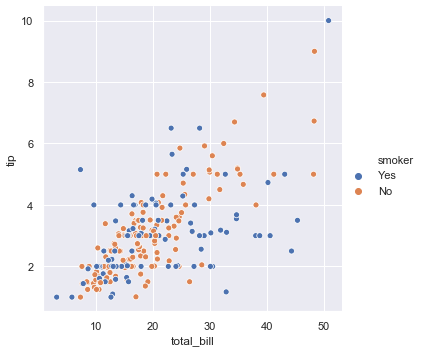

In [49]:
# Scatterplot of 3 dimensions of data, total bill, tip, and whether the customer was a smoker 
sns.relplot(x="total_bill", y="tip", hue="smoker", data=df);

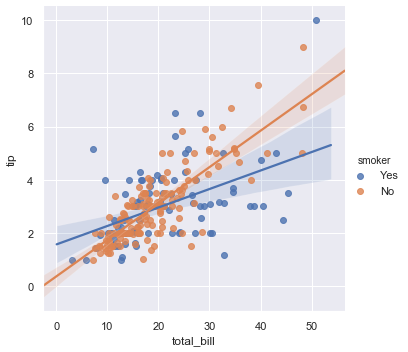

In [50]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=df, );

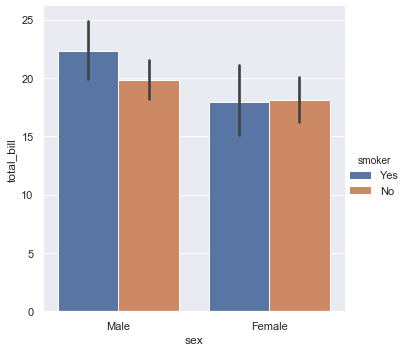

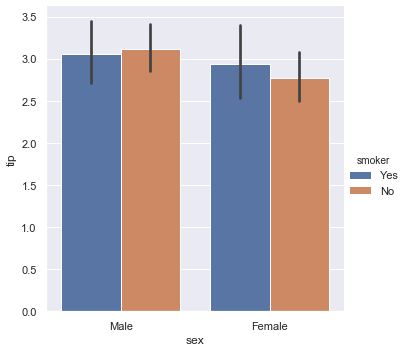

In [79]:
# Bar chart of male and female tips differenciating between smoker and non-smoker
sns.catplot(x="sex", y="total_bill", hue="smoker", kind=("bar"), data=df);

sns.catplot(x="sex", y="tip", hue="smoker", kind=("bar"), data=df);

Male smokers tip less than male non-smokers while spending more on the total bill. However, female smokers tip more than non-smokers despite spending less on the total bill, on average.

## Party Size

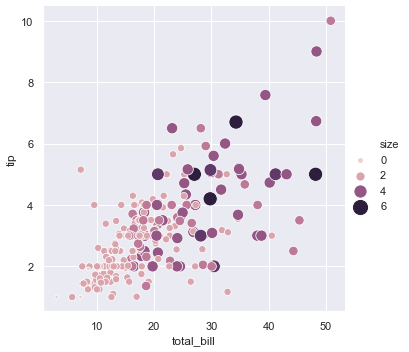

In [52]:
# Scatterplot with part size as third dimension
sns.relplot(x="total_bill", y="tip", hue="size", size="size", sizes=(15, 200), data=tips);

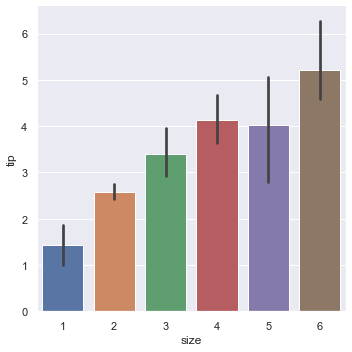

In [53]:
# scatterplot of tips based on party size 
sns.catplot(x="size", y="tip", kind=("bar"), data=tips);

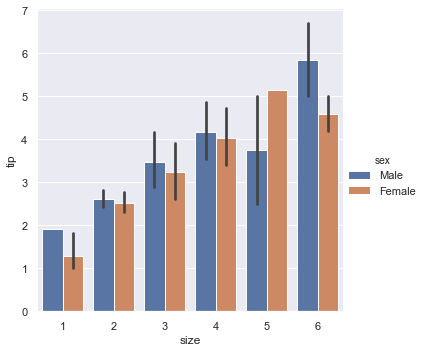

In [54]:
sns.catplot(x="size", y="tip", kind=("bar"), hue="sex", data=tips);

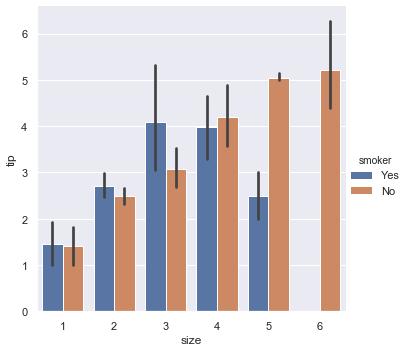

In [55]:
sns.catplot(x="size", y="tip", kind=("bar"), hue="smoker", data=tips);

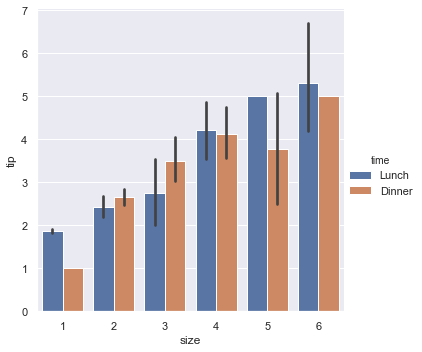

In [56]:
sns.catplot(x="size", y="tip", kind=("bar"), hue="time", data=tips);

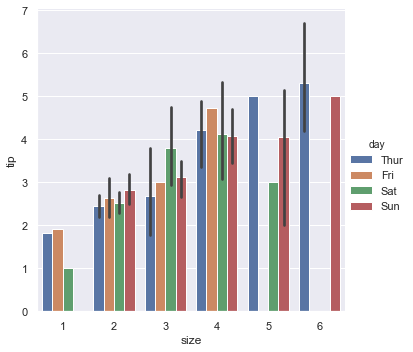

In [57]:
sns.catplot(x="size", y="tip", kind=("bar"), hue="day", data=tips);

## Time

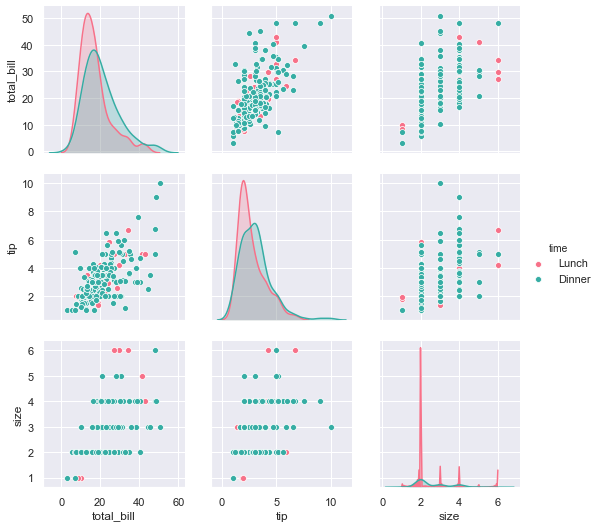

In [58]:
sns.pairplot(tips, hue="time", palette="husl");

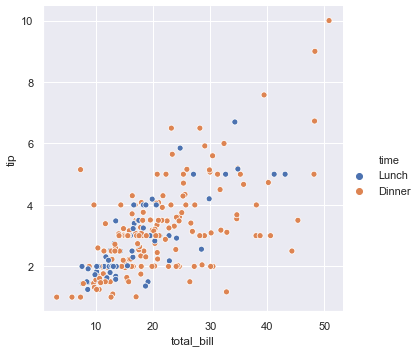

In [59]:
sns.relplot(x="total_bill", y="tip", hue="time", data=tips);

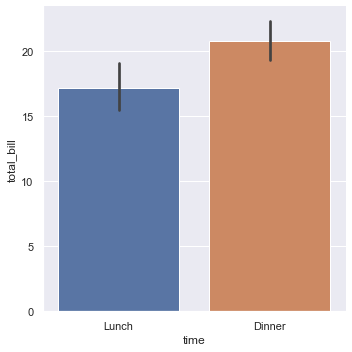

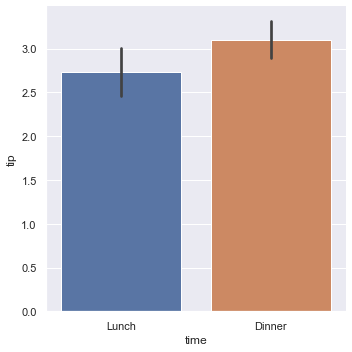

In [60]:
sns.catplot(x="time", y="total_bill", kind=("bar"), data=tips);

sns.catplot(x="time", y="tip", kind=("bar"), data=tips);

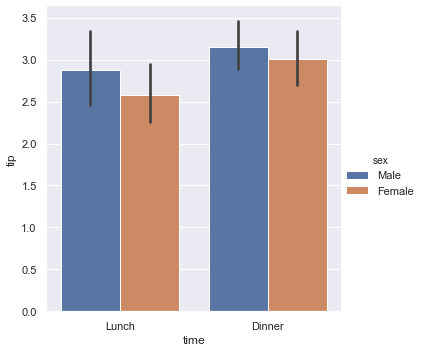

In [61]:
sns.catplot(x="time", y="tip", kind=("bar"), hue="sex", data=tips);

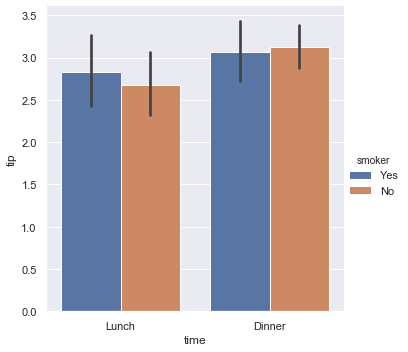

In [62]:
sns.catplot(x="time", y="tip", kind=("bar"), hue="smoker", data=tips);

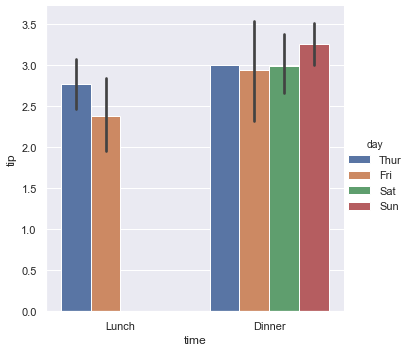

In [63]:
sns.catplot(x="time", y="tip", kind=("bar"), hue="day", data=tips);

## Day

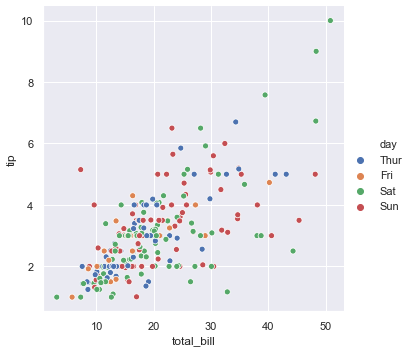

In [64]:
sns.relplot(x="total_bill", y="tip", hue="day", data=tips);

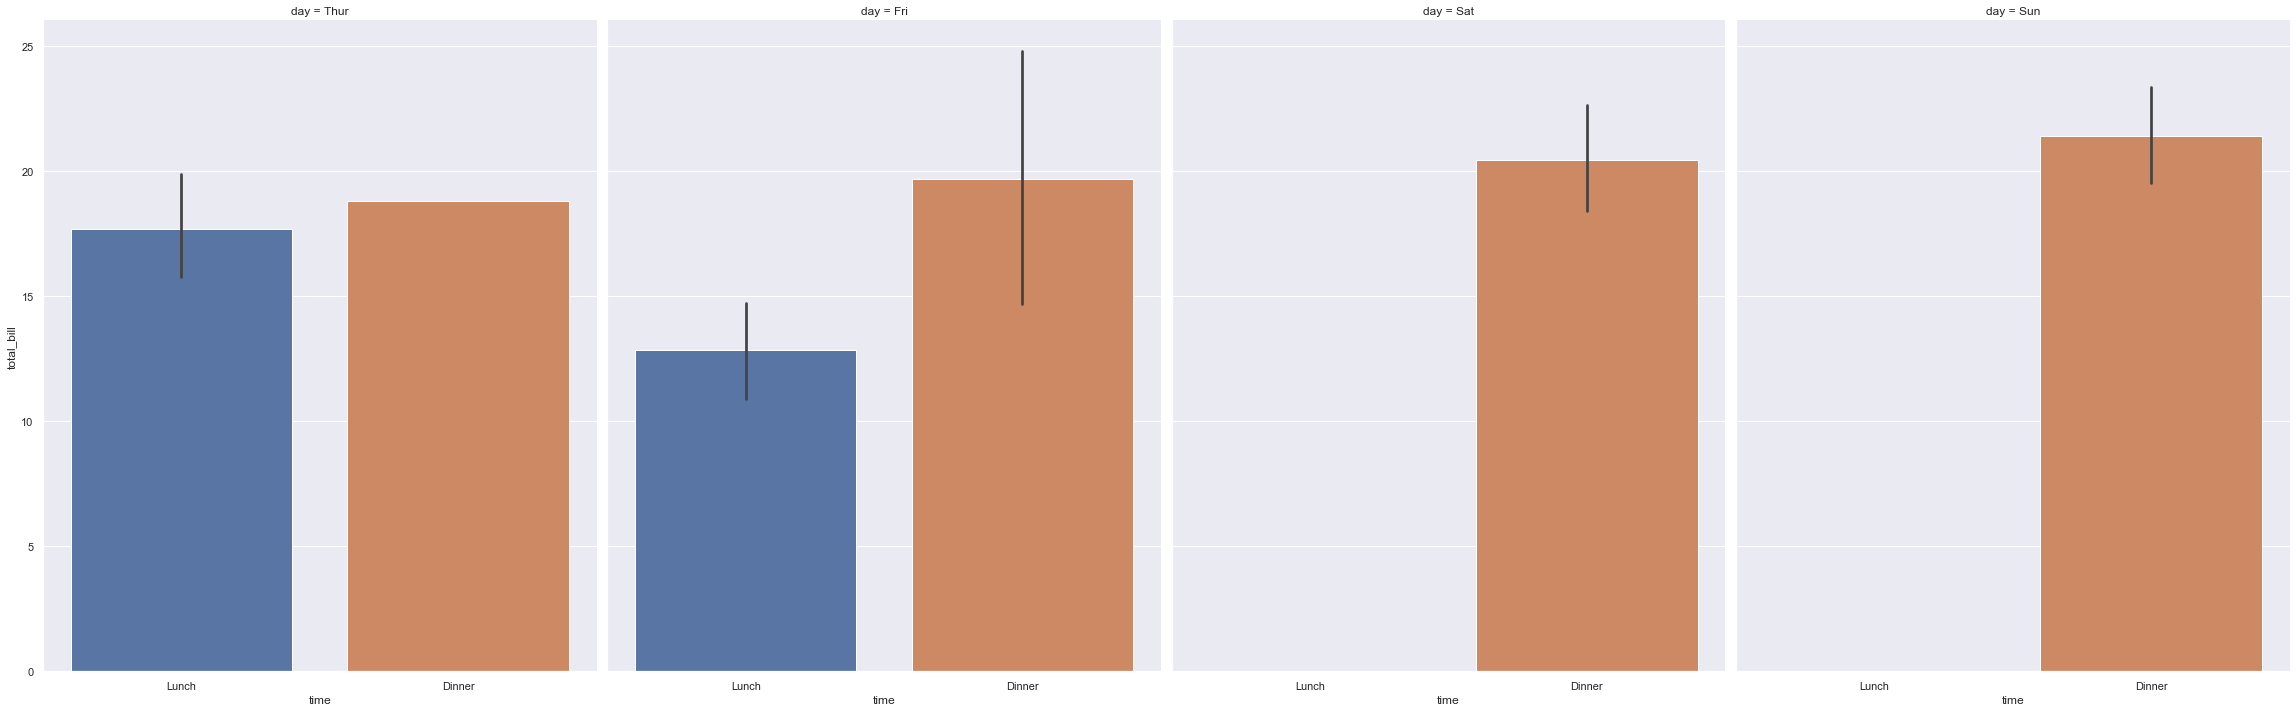

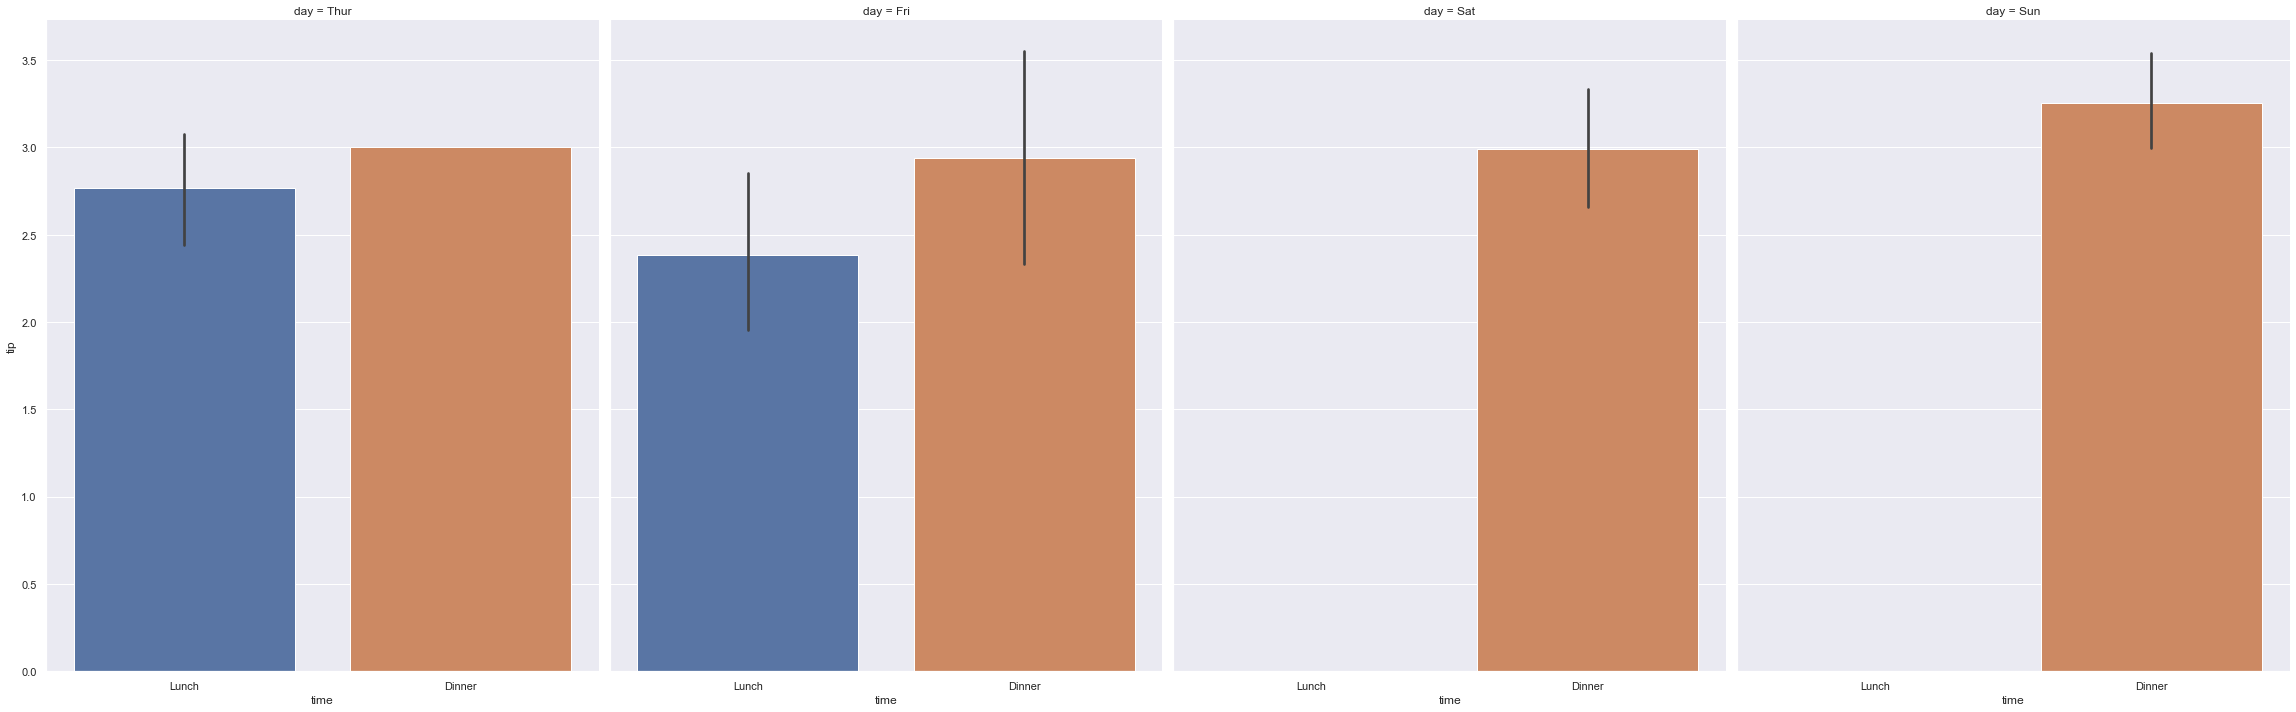

In [65]:
sns.catplot(x="time", y="total_bill", col="day", kind=("bar"), height=10, aspect=.8, data=tips);

sns.catplot(x="time", y="tip", col="day", kind=("bar"), height=10, aspect=.8, data=tips);



## Pandas

In [66]:
# created pivot table of dataset
fp = tips.pivot_table(index='day', columns='size', values='tip')

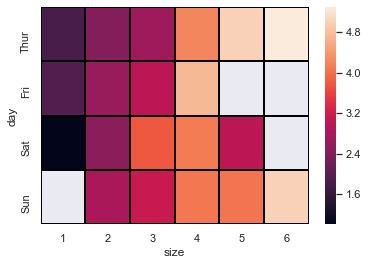

In [67]:
# heatmp of day, size, and tip
sns.heatmap(fp, linecolor='black', linewidth=1)

In [68]:
tc = tips.corr()

In [69]:
tc

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


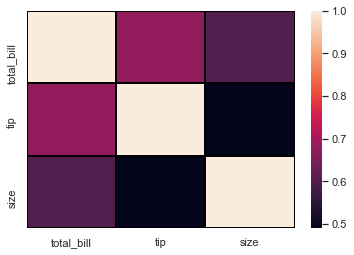

In [70]:
sns.heatmap(tc, linecolor='black', linewidth=1)